<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Characterising/spread_of_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Measure of Width and Balance**

* Variance
* Standard Deviation
* Skewness
* Kurtosis

##**Variance**

The **variance** of a distribution is a measure of how much it spreads out around the mean. A touch more formally, it's the expected value of the squared deviation from the mean

## Import libraries and packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

## Load the Data

In [6]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
filename = '/content/drive/MyDrive/Data Science/Statistical Analysis/dataset.txt'

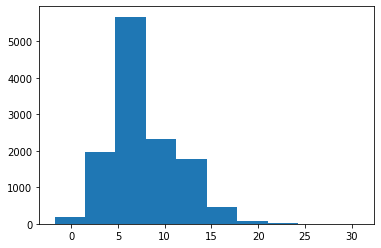

In [8]:
data = np.loadtxt(filename)
plt.hist(data);

In [2]:
## manually

def get_variance(xs):
  mean = np.mean(xs)
  summed = 0
  for x in xs:
    summed += (x - mean)**2
  return summed / (len(xs) - 1)
print(get_variance([1,2,3,4,5]))    

2.5


In [3]:
## numpy

variance = np.var([1,2,3,4,5], ddof=1 )
print(variance)

2.5


## **Standard Deviation**

Square root of the variance

In [9]:
std = np.std(data)
print(std)

3.6244414221454435


## **Gaussian approximation**

Combine mean and standard deviation for Gaussian approximation, also known as normal approximation.

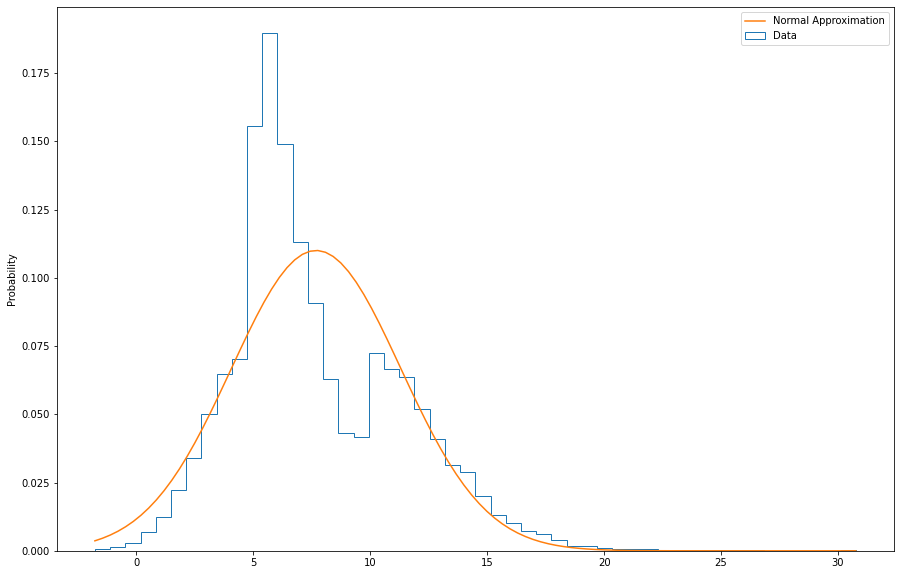

In [11]:
mean = np.mean(data)

xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs,ys, label="Normal Approximation")
plt.legend()
plt.ylabel("Probability");

## **Skewness**

In [12]:
def get_skewness(xs):
  mean = np.mean(xs)
  var = np.var(xs)
  summed = 0

  for x in xs:
    summed += (x - mean)**3
  return (summed / (len(xs))) / var ** 1.5  

In [13]:
## compare skewness from scipy and our manual function

skewness = st.skew(data)

print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


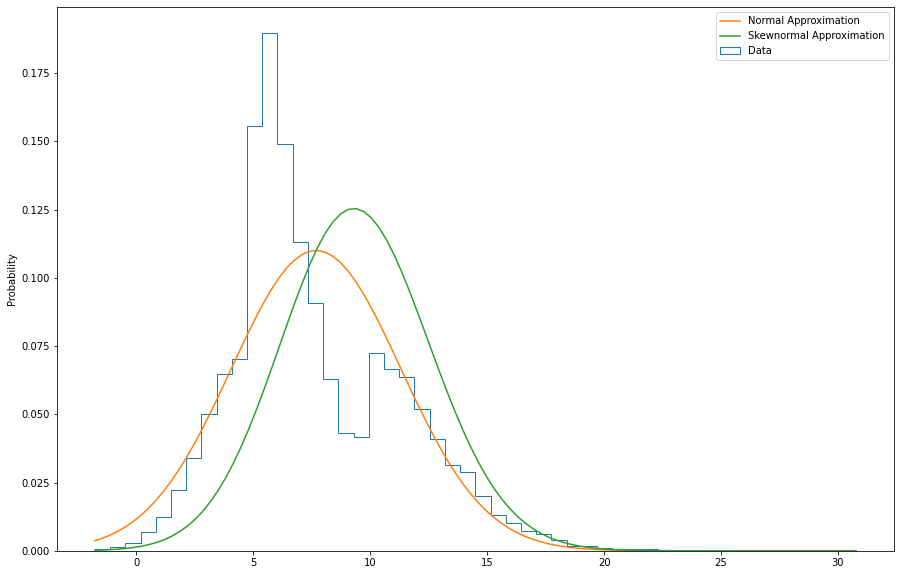

In [14]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)
ys1 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs,ys, label="Normal Approximation")
plt.plot(xs,ys1, label="Skewnormal Approximation")
plt.legend()
plt.ylabel("Probability");

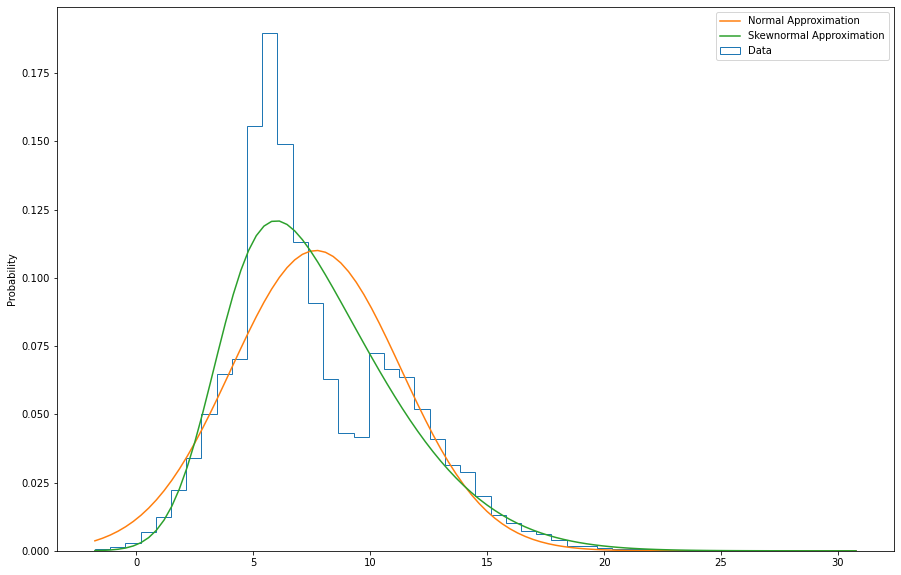

In [15]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys1 = st.skewnorm.pdf(xs, *ps)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs,ys, label="Normal Approximation")
plt.plot(xs,ys1, label="Skewnormal Approximation")
plt.legend()
plt.ylabel("Probability");

The skewnormal fits the data better as it takes in consideration of the peak of the data

## **Kurtosis**

In [17]:
def get_kurtosis(xs):
  mean = np.mean(xs)
  var = np.var(xs)
  summed = 0

  for x in xs:
    summed += (x - mean)**4
  return (summed / (len(xs))) / var ** 2
print(get_kurtosis([1,2,3,4,5]))

1.7


In [19]:
## compare scipy kurtosis and manual kurtosis

kurtosis = st.kurtosis(data, fisher=False)

print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


## **Percentiles**

What if we - instead of using a mean or other such numbers - simply turned our long data vector down into a few points representing different percentiles ? We could essentiallly reconstruct our data distribution to an arbitrary accuracy and never worry about analytic functions.